In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score
import warnings
import pickle
warnings.filterwarnings("ignore")

In [23]:
def load_data(path):
    return pd.read_excel(path)

In [24]:
load_data

<function __main__.load_data(path)>

In [25]:
def preprocess_data(df, features):
   # """Select features, handle missing values, and scale the data."""
    X= df[features].copy()
    X = X.dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, X.index

In [26]:
def plot_elbow(X_scaled):
    # """Plot the elbow curve to determine the optimal number of clusters."""
    inertia = []
    k_range = range(2, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(k_range)
    plt.grid()
    plt.savefig("elbow_plot.png")
    plt.show()


In [27]:
def kmeans(X_scaled, n_clusters):
    # """Perform KMeans clustering and return the cluster labels."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    return kmeans.labels

In [28]:
def evaluate_clustering(X_scaled, labels):
    # """Evaluate clustering performance using silhouette score, Calinski-Harabasz index, and Davies-Bouldin index."""
    print("\nClustering Evaluation Metrics:")
    silhouette = silhouette_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)

    print(f'Silhouette Score: {silhouette:.4f}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz:.4f}')
    print(f'Davies-Bouldin Index: {davies_bouldin:.4f}')

In [29]:
def visualize_clusters(df, features, cluster_col):
    sns.pairplot(df, vars=features, hue=cluster_col, palette='tab10')
    plt.suptitle('Cluster Visualization', y=1.02)
    plt.show()

In [30]:
def cluster_profitting(df, features, clusters_col):
    for c in sorted(df[clusters_col].unique()):
        print(f"\nCluster {c}:\n")
        print(df[df[clusters_col] == c][features].describe())

Data loaded and preprocessed.

--- Elbow Method ---


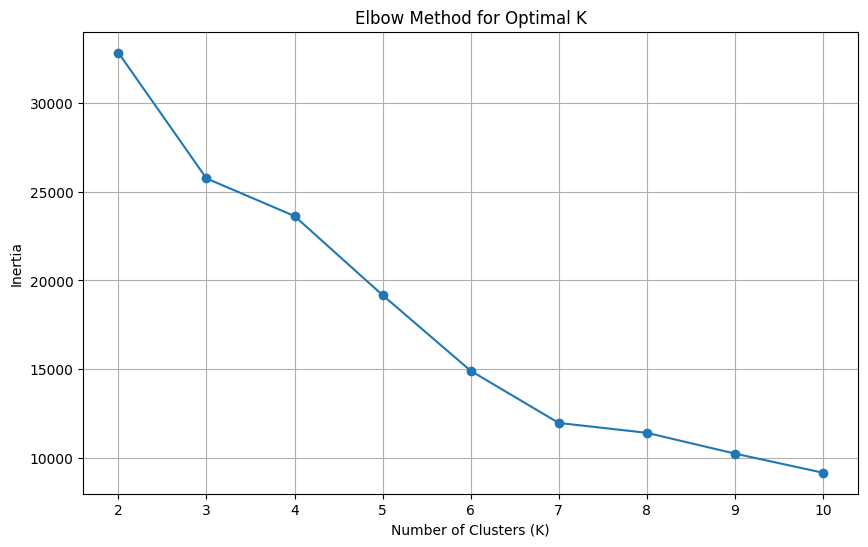


Clustering Evaluation Metrics:
Silhouette Score: 0.3681
Calinski-Harabasz Index: 2304.5600
Davies-Bouldin Index: 1.0508

--- Cluster Means ---
               Sales  Quantity  Discount       Profit
Cluster                                              
0.0       124.439315  2.544343  0.155165    14.337664
1.0      6423.002812  5.343750  0.043750  2508.018009
2.0       366.433292  6.441335  0.155399    51.037359
3.0      3259.930966  5.965517  0.610345 -1782.624648

--- Cluster Visualization ---


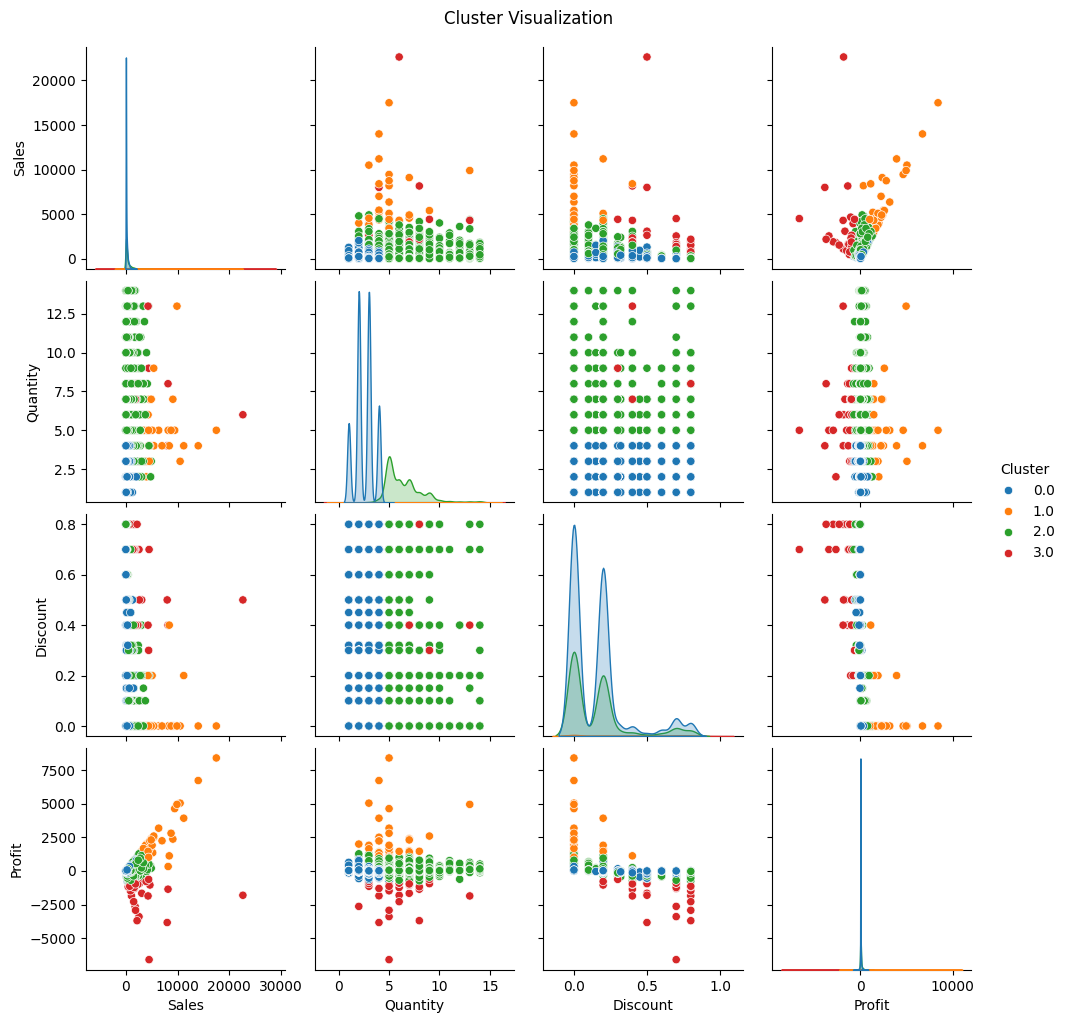


--- Cluster Profiling ---

Cluster 0.0:

             Sales     Quantity     Discount       Profit
count  6788.000000  6788.000000  6788.000000  6788.000000
mean    124.439315     2.544343     0.155165    14.337664
std     202.851328     0.915274     0.203154    64.449736
min       0.444000     1.000000     0.000000  -766.012000
25%      12.960000     2.000000     0.000000     1.399050
50%      38.973000     3.000000     0.200000     6.220800
75%     145.611000     3.000000     0.200000    19.872000
max    2033.584000     5.000000     0.800000   843.170600

Cluster 1.0:

              Sales   Quantity   Discount       Profit
count     32.000000  32.000000  32.000000    32.000000
mean    6423.002812   5.343750   0.043750  2508.018009
std     3438.174692   2.119181   0.098169  1750.696887
min     2999.950000   2.000000   0.000000   327.506000
25%     4229.151500   4.000000   0.000000  1434.182000
50%     4991.945000   5.000000   0.000000  1951.237500
75%     8487.469500   7.000000   0.0

In [31]:
def main():
    data_path = r'/content/Sample - Superstore (1).xls'  # Update path if needed
    features = ['Sales', 'Quantity', 'Discount', 'Profit']
    df = load_data(data_path)
    X_scaled, valid_idx = preprocess_data(df, features)
    print('Data loaded and preprocessed.')

    print('\n--- Elbow Method ---')
    plot_elbow(X_scaled)

    n_clusters = 4  # Set based on elbow plot
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans_model.fit_predict(X_scaled)
    df.loc[valid_idx, 'Cluster'] = labels

    evaluate_clustering(X_scaled, labels)

    print('\n--- Cluster Means ---')
    print(df.groupby('Cluster')[features].mean())

    print('\n--- Cluster Visualization ---')
    visualize_clusters(df.loc[valid_idx], features, 'Cluster')

    print('\n--- Cluster Profiling ---')
    cluster_profitting(df.loc[valid_idx], features, 'Cluster')

    return kmeans_model, StandardScaler() # Return scaler object as well

if __name__ == '__main__':
    kmeans_model, scaler = main()

In [32]:
import pickle

# Save model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

# Save scaler if available
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved.")

Model and scaler saved.
